# Handle Training Data set

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [122]:
! pip install xgboost

In [123]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [93]:
df = pd.read_csv("E:/Dataset/Kaggle Advanced Regression/train.csv")

In [124]:
df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [95]:
df.shape

(1460, 81)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlations Between Variables')

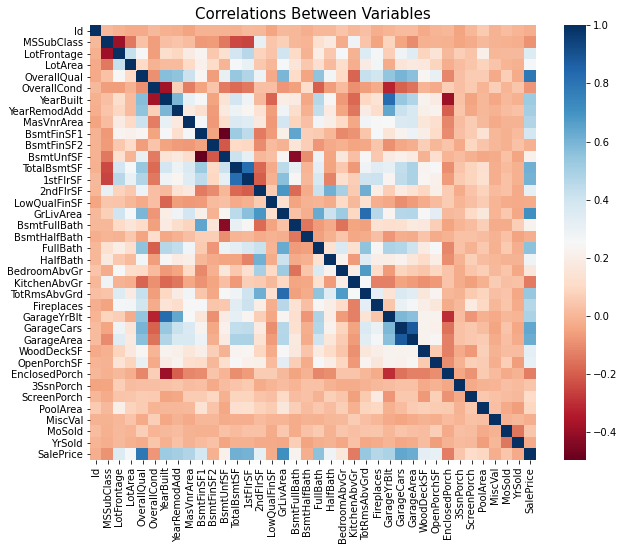

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

Feature Selection

In [104]:
important_cols= list(df.corr()["SalePrice"][df.corr()["SalePrice"]>0.50].index)

df = df[important_cols]

In [105]:
df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   1stFlrSF      1460 non-null   int64
 5   GrLivArea     1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   GarageArea    1460 non-null   int64
 10  SalePrice     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [107]:
df.isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

Data Visualization

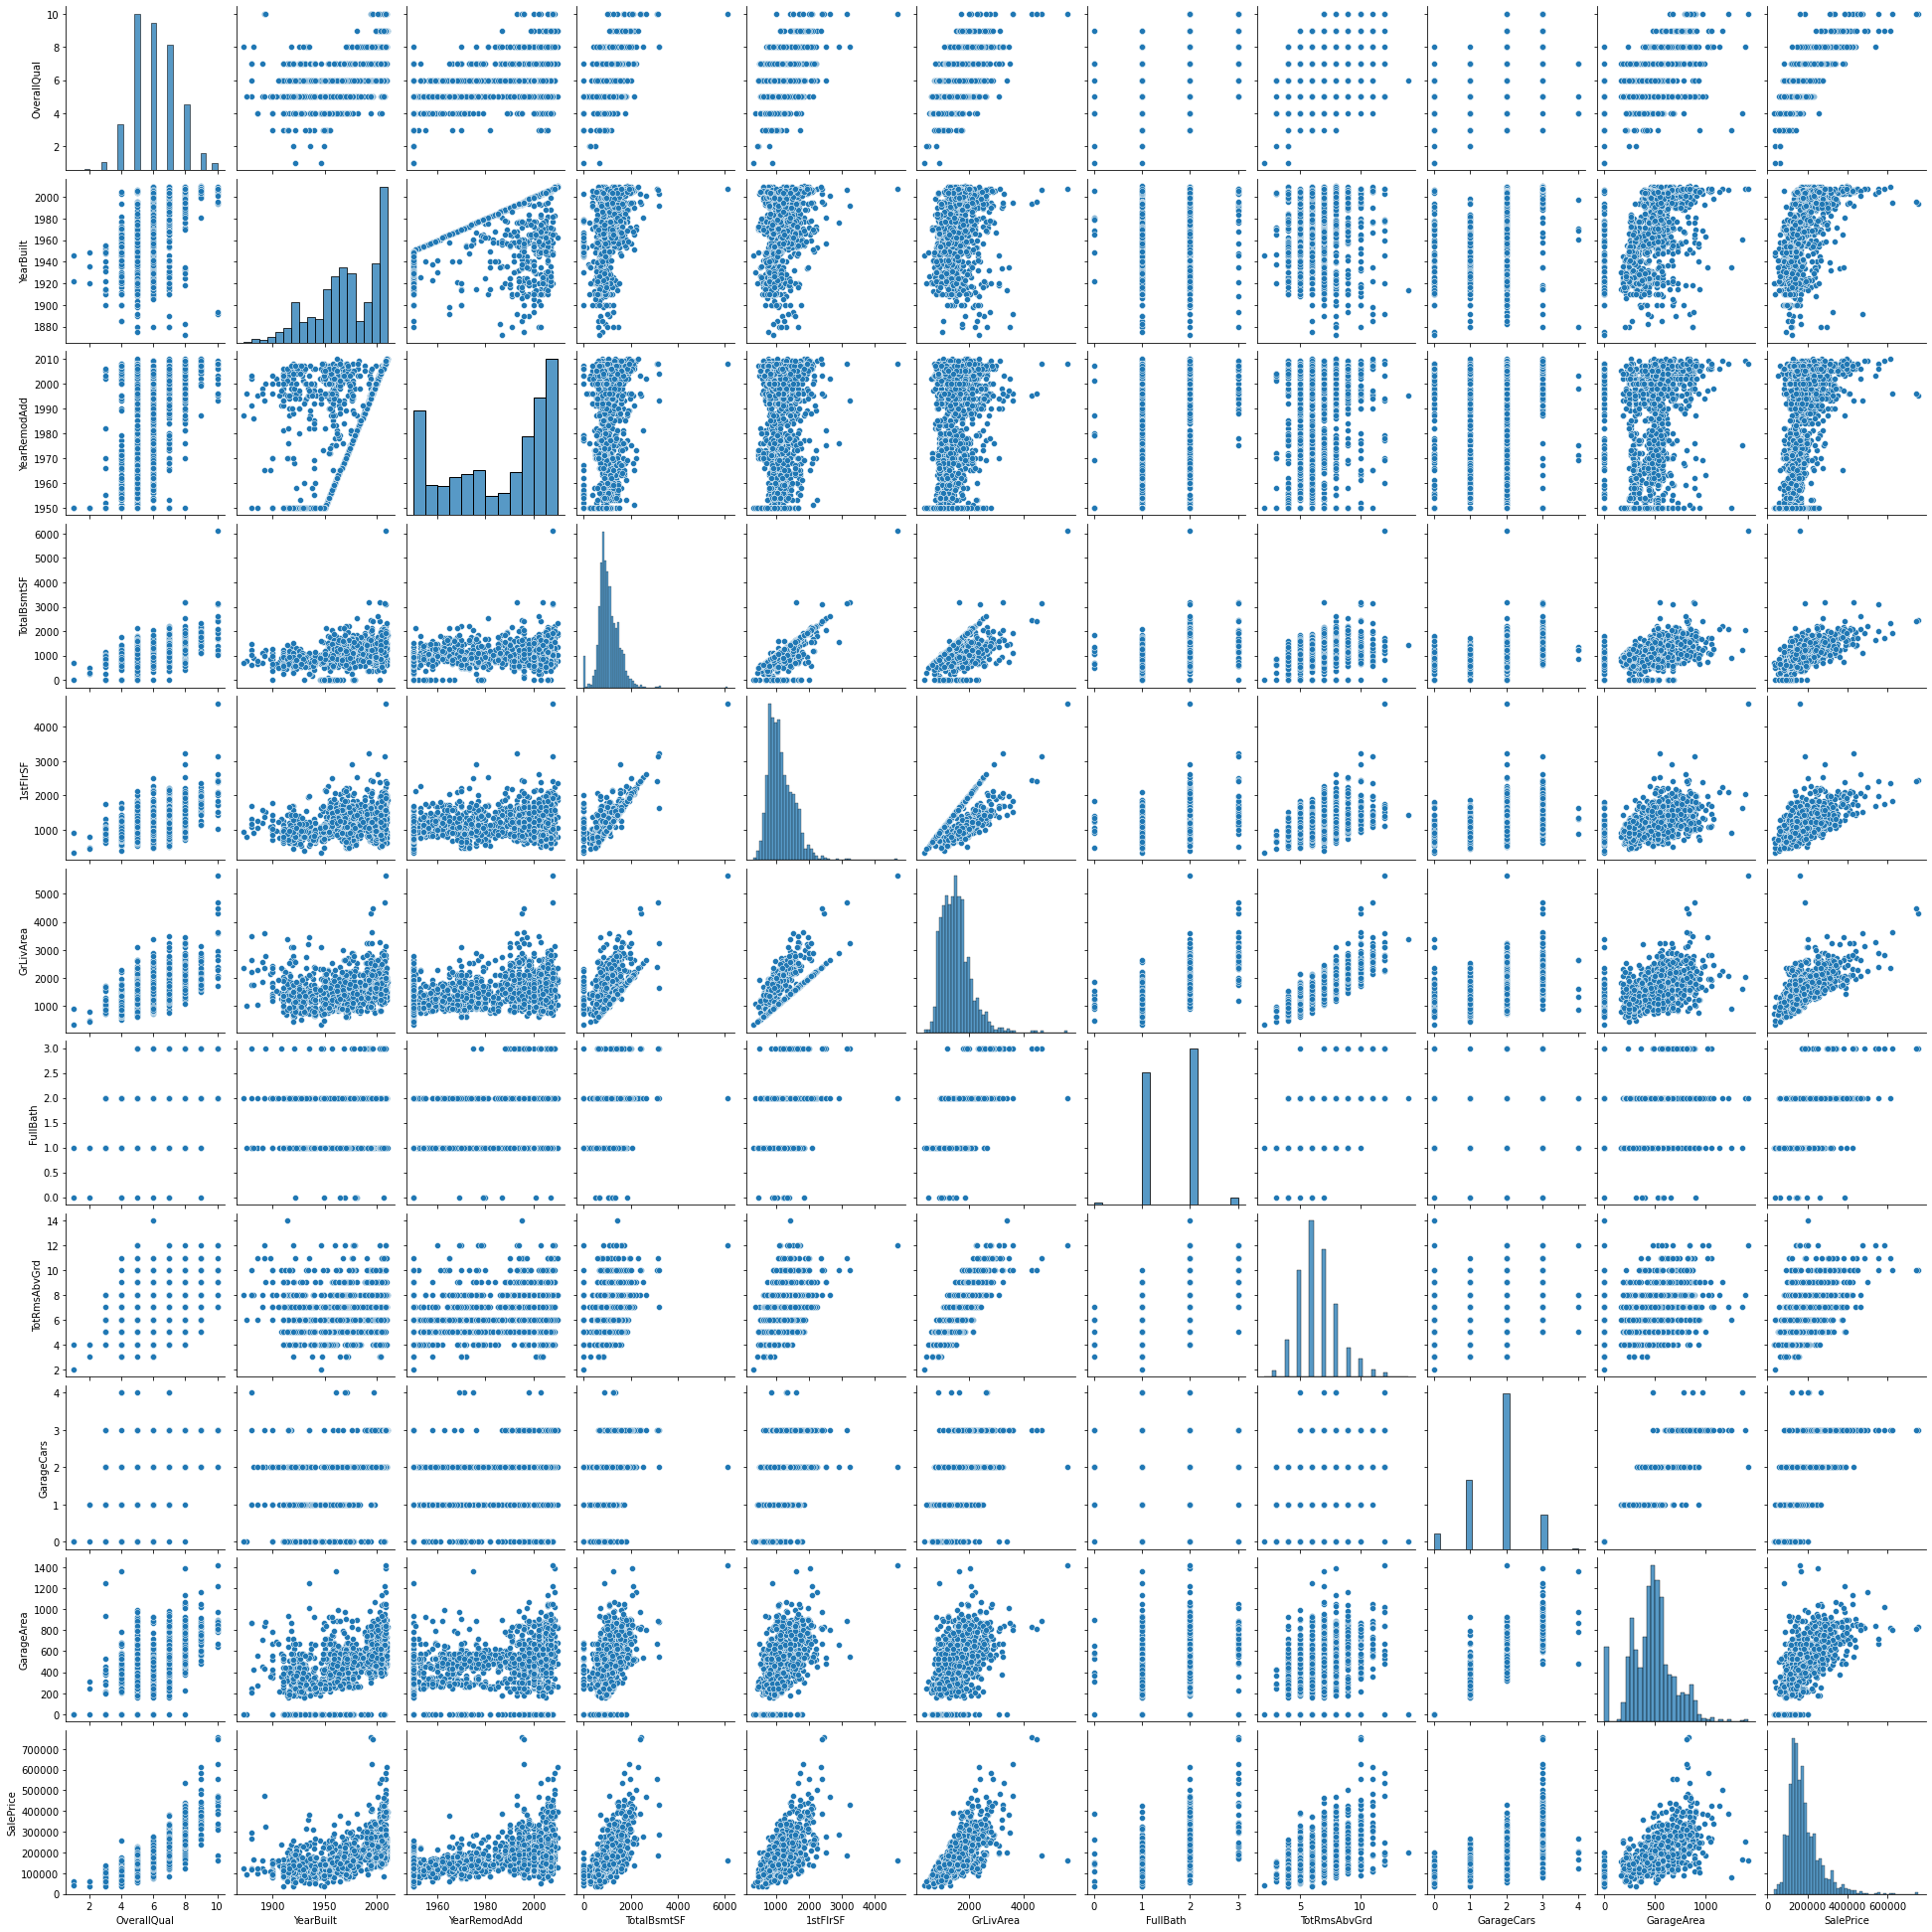

In [108]:
sns.pairplot(df)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

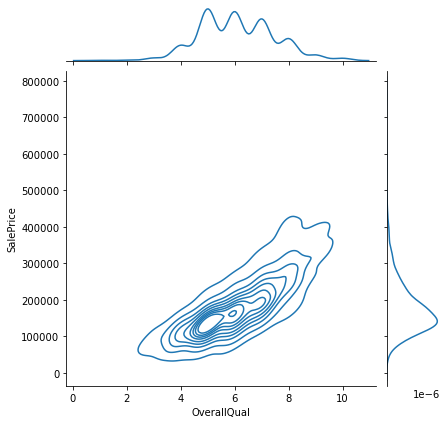

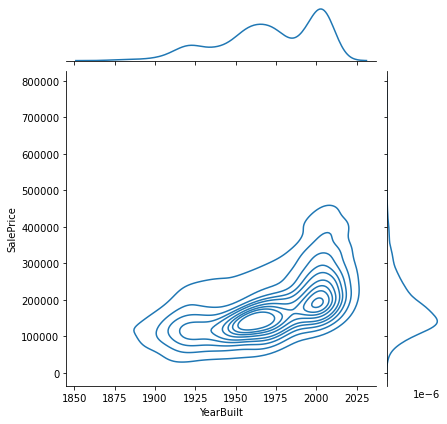

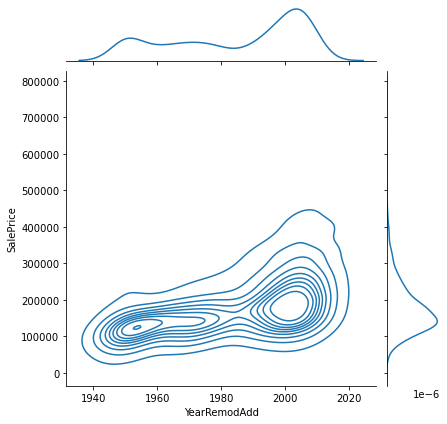

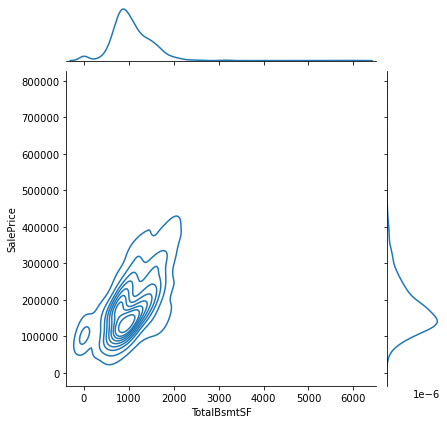

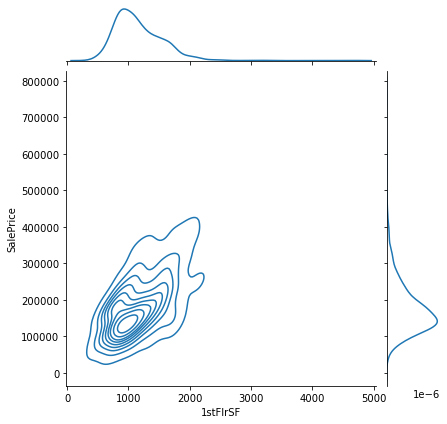

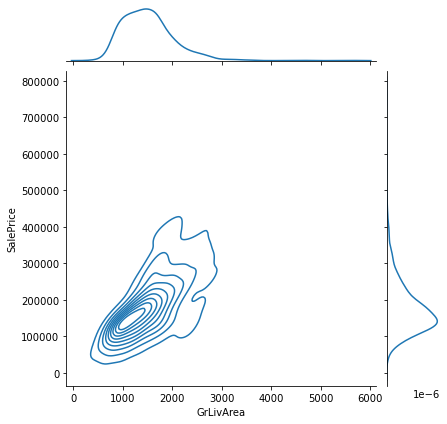

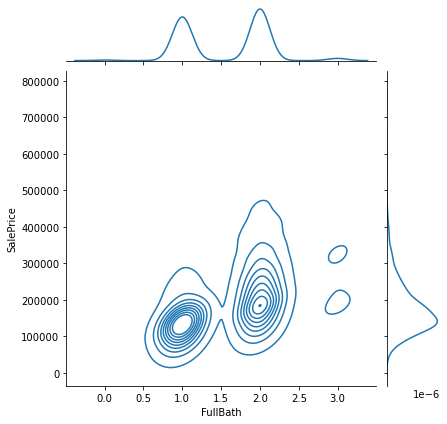

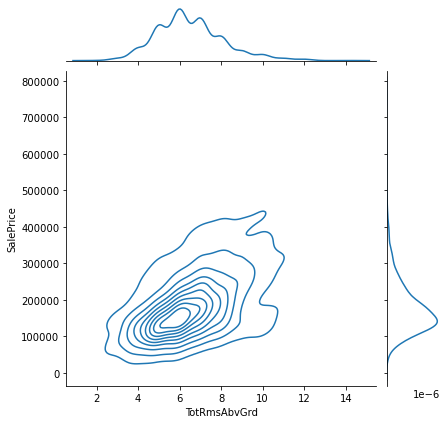

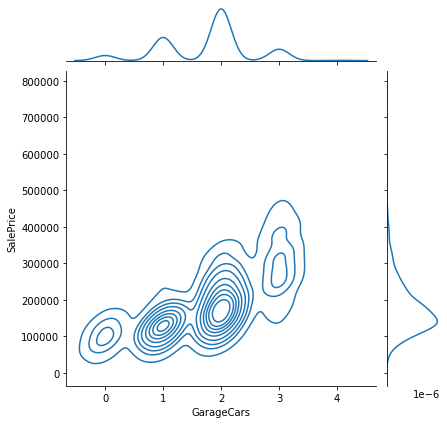

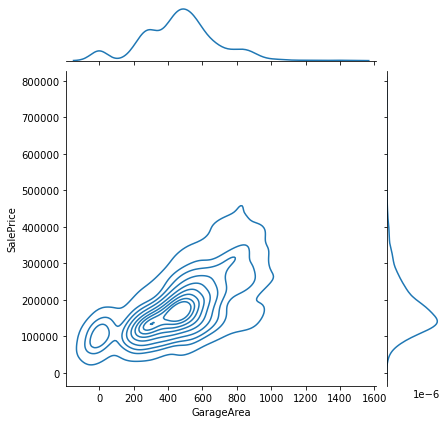

In [109]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearBuilt"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearRemodAdd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotalBsmtSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["1stFlrSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GrLivArea"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["FullBath"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotRmsAbvGrd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageCars"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageArea"], y=df["SalePrice"], kind="kde")
plt.show()

x, y split

In [110]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

Standardizing the Data

In [111]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

Train-Test Split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y_hat, predictions):
    mae = mean_absolute_error(y_hat, predictions)
    mse = mean_squared_error(y_hat, predictions)
    rmse = np.sqrt(mean_squared_error(y_hat, predictions))
    r_squared = r2_score(y_hat, predictions)
    return mae, mse, rmse, r_squared

Machine Learning Models

In [117]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [125]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

LinearRegression()

MAE: 24774.21951960476
MSE: 1558239575.1510882
RMSE: 39474.54338116007
R2 Score: 0.7968483304281099
------------------------------
RMSE Cross-Validation: 38573.182562015965


In [126]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

Ridge()

MAE: 24769.08210459199
MSE: 1558588250.7511775
RMSE: 39478.95959560203
R2 Score: 0.7968028727004108
------------------------------
RMSE Cross-Validation: 38567.47871616677


In [127]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

Lasso()

MAE: 24774.001314228393
MSE: 1558252781.787728
RMSE: 39474.71066122877
R2 Score: 0.7968466086451917
------------------------------
RMSE Cross-Validation: 38573.030122738746


In [128]:
svr = SVR(C=1000000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

SVR(C=1000000)

MAE: 20460.02849392541
MSE: 987576917.7116026
RMSE: 31425.736550025405
R2 Score: 0.8712470772382224
------------------------------
RMSE Cross-Validation: 31145.02713017409


In [129]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

RandomForestRegressor()

MAE: 18707.06444390085
MSE: 856265454.6821774
RMSE: 29262.013852128795
R2 Score: 0.8883664877407882
------------------------------
RMSE Cross-Validation: 32060.19624972322


In [130]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
4,SVR,20460.028494,9.875769e+08,31425.736550,0.871247,31145.027130
5,RandomForestRegressor,18707.064444,8.562655e+08,29262.013852,0.888366,32060.196250
2,Ridge,24769.082105,1.558588e+09,39478.959596,0.796803,38567.478716
3,Lasso,24774.001314,1.558253e+09,39474.710661,0.796847,38573.030123
0,LinearRegression,24774.219520,1.558240e+09,39474.543381,0.796848,38573.182562
1,LinearRegression,24774.219520,1.558240e+09,39474.543381,0.796848,38573.182562


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='Model', ylabel='RMSE (Cross-Validation)'>

Text(0.5, 1.0, 'Evaluation of not Optimized Models Based on RMSE (Cross-Validated)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LinearRegression'),
  Text(1, 0, 'Ridge'),
  Text(2, 0, 'Lasso'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'RandomForestRegressor')])

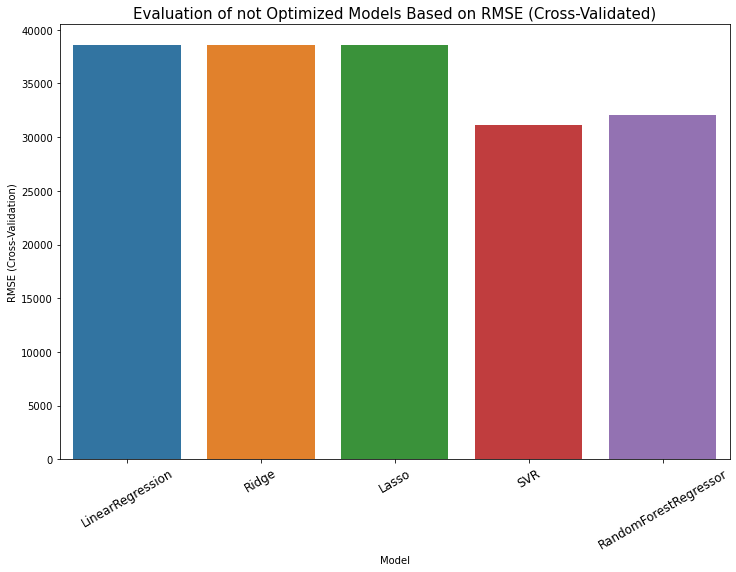

In [131]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Evaluation of not Optimized Models Based on RMSE (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()